# Evaluation Project - 5
CENSUS INCOME PROJECT

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year



# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.

These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

Step-1 Loading libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dt = pd.read_csv('census_income.csv')

In [3]:
# Preview dataset
dt.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Showing the Shape of dataset
print('Rows: {} Columns: {}'.format(dt.shape[0], dt.shape[1]))

Rows: 32560 Columns: 15


In [5]:
# Features data-type
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Statistical summary
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [7]:
# Check for null values
round((dt.isnull().sum() / dt.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [8]:
# Check for '?' in dataset
round((dt.isin(['?']).sum() / dt.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [9]:
# Checking the counts of label categories
Income = dt['Income'].value_counts(normalize=True)
round(Income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

Observations:

*The dataset doesn't have any null values, but it contains missing values in the form of '?' which have to be preprocessed.

*The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# Step 03: Exploratory Data Analysis

Univariate Analysis

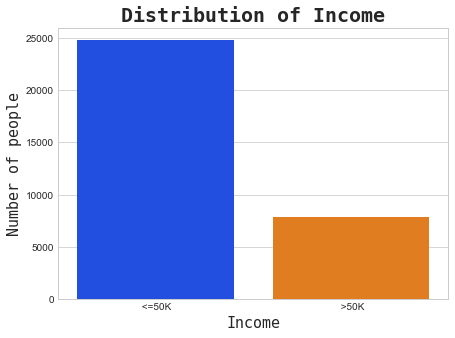

In [10]:


# Creating a barplot for 'Income'

Income = dt['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(Income.index, Income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

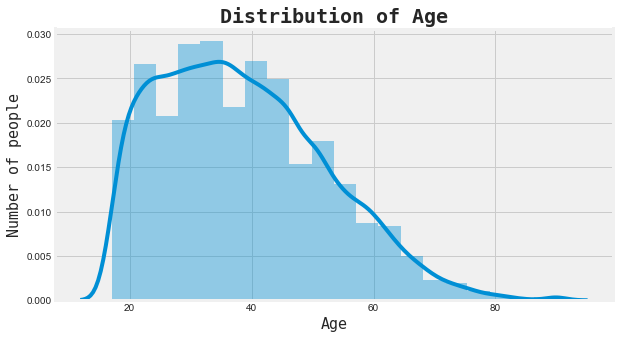

In [11]:
# Creating a distribution plot for 'Age'

Age     = dt['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dt['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [26]:
#  Now Creating a barplot for 'Education'

Edu = dt['Education'].value_counts()



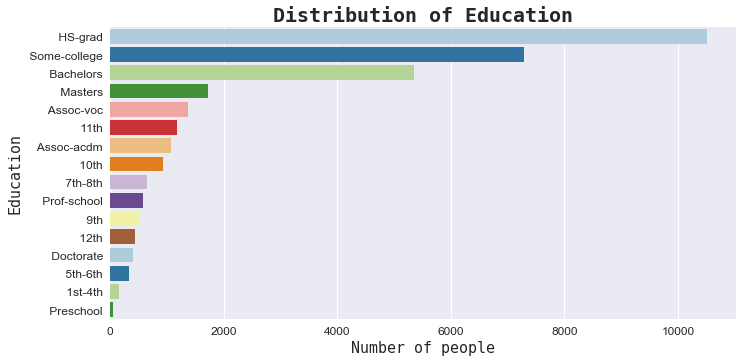

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(Edu.values, Edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

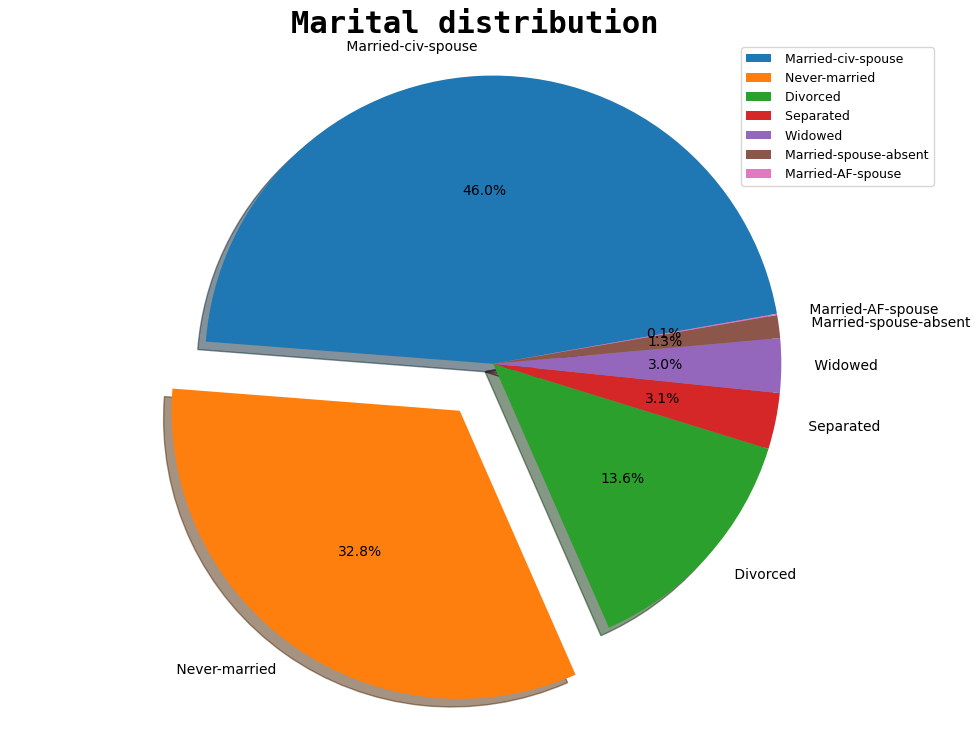

In [29]:
marital = dt['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(12, 9))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 22, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 9})
plt.axis('equal')
plt.show()

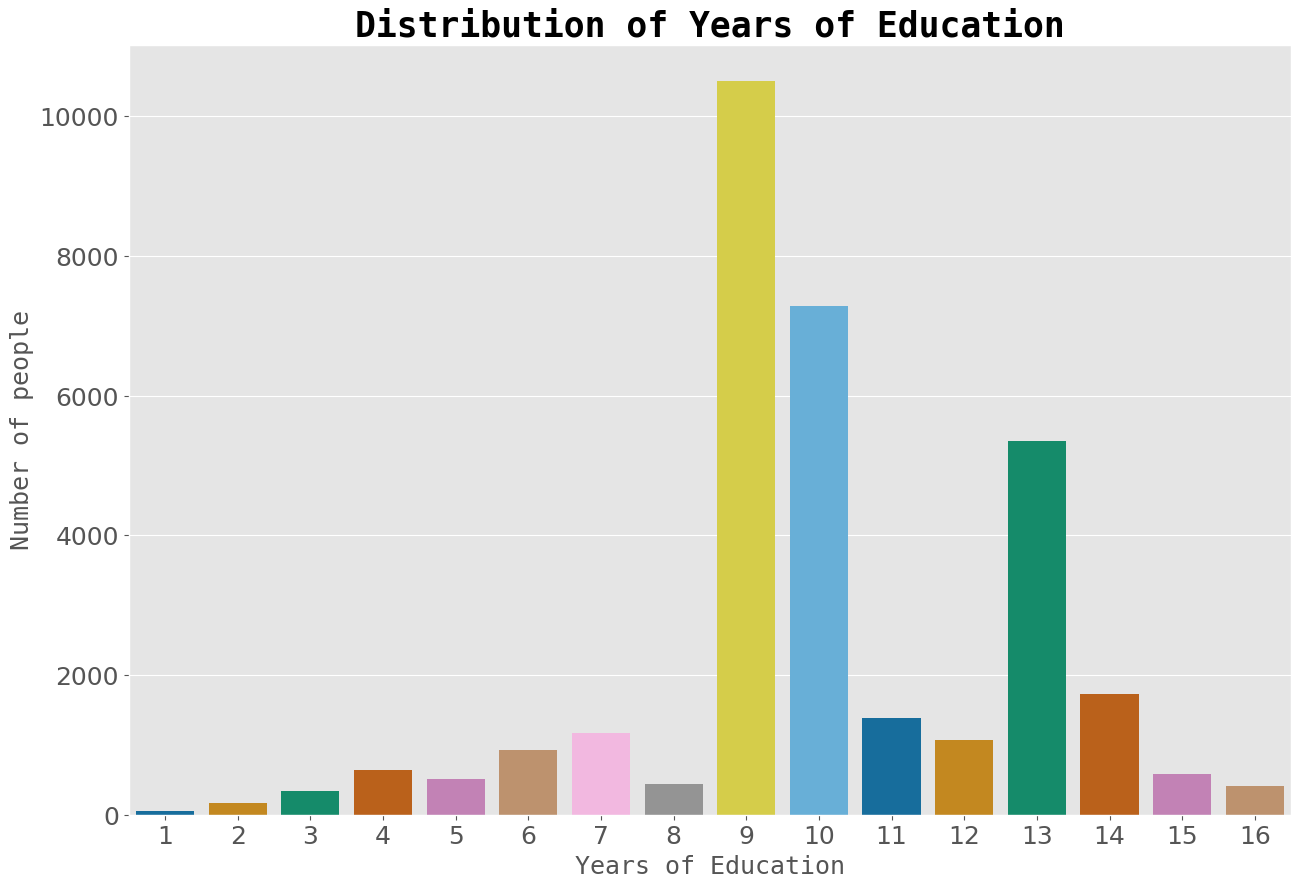

In [30]:
# Creating a barplot for 'Years of Education'

Edu_num = dt['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.barplot(Edu_num .index, Edu_num .values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.tick_params(labelsize=18)
plt.show()

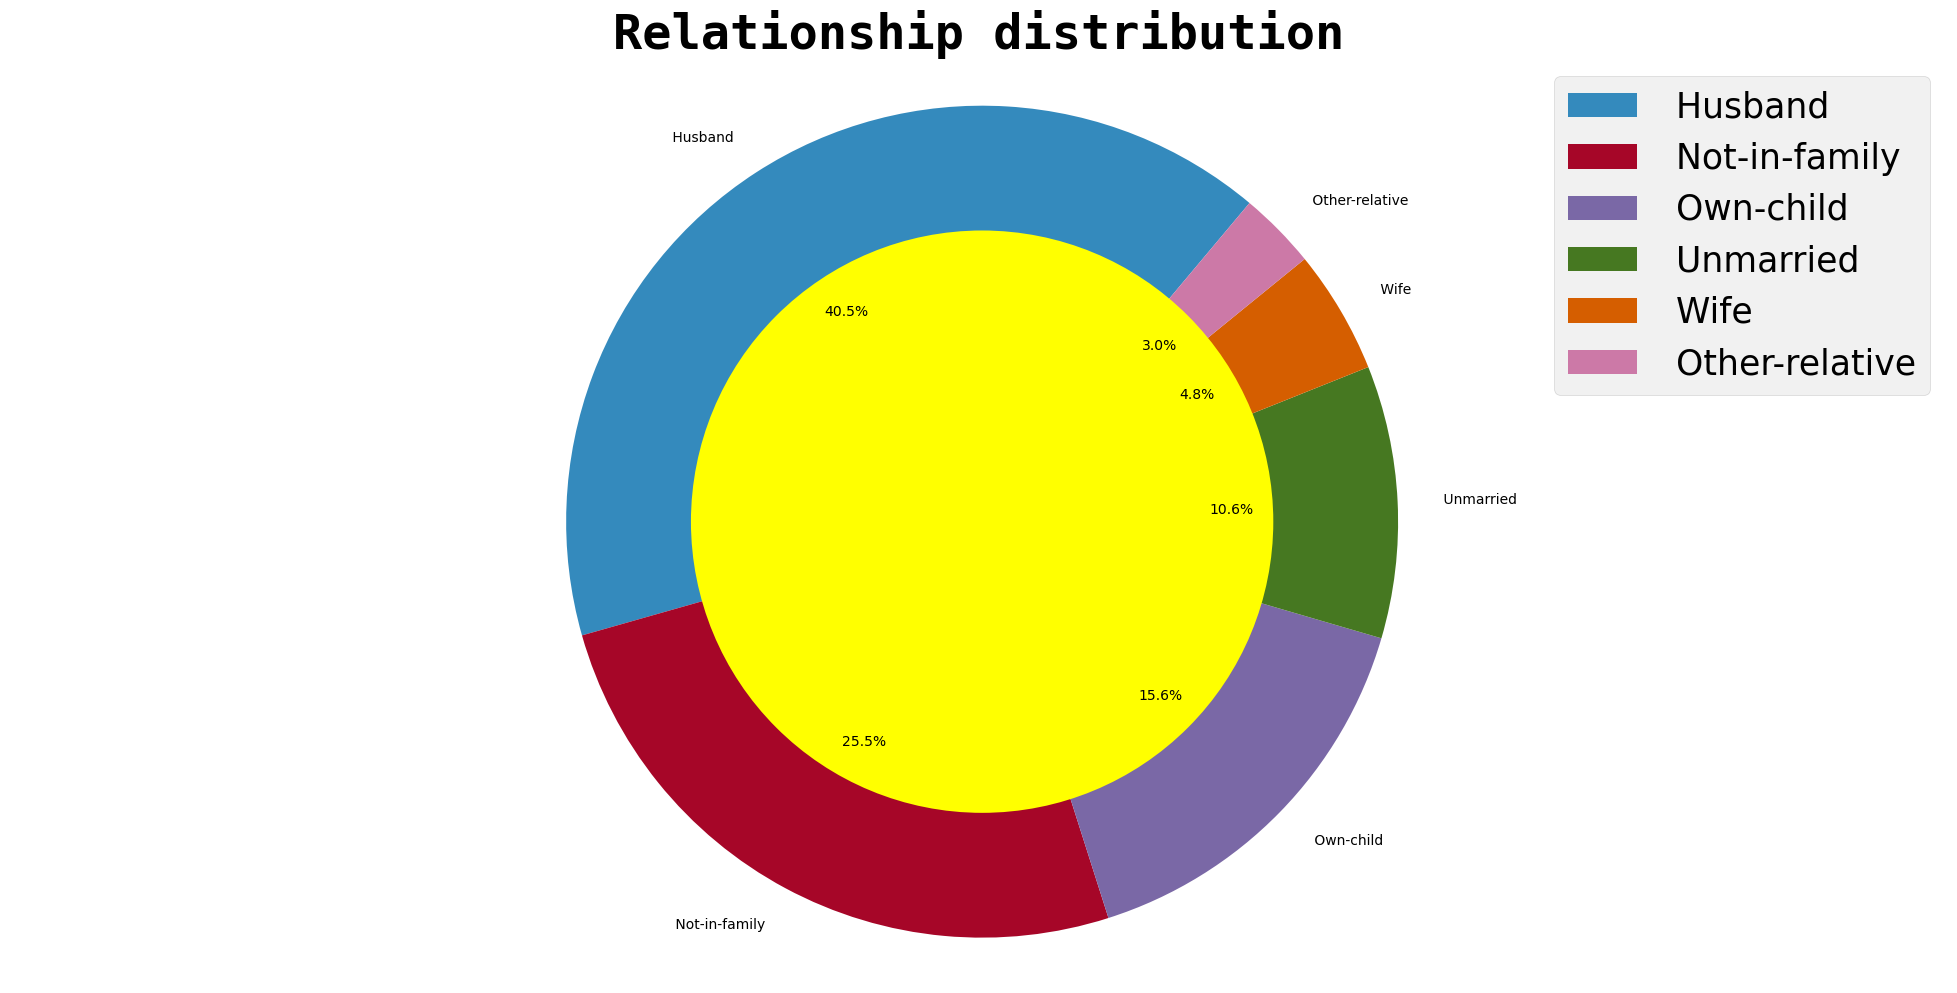

In [31]:
# Creating a donut chart for 'Relationship '

relation = dt['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(25, 12))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 35, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 25})
plt.show()

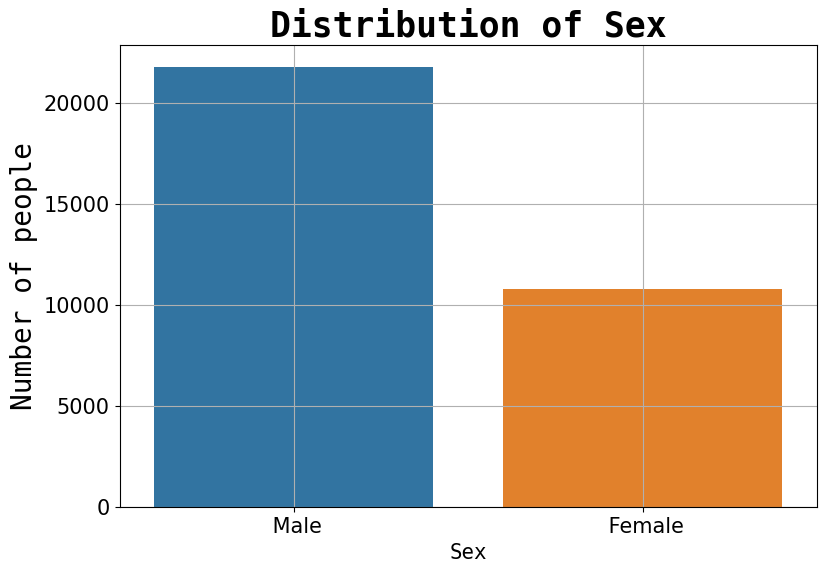

In [32]:
# Creating a barplot for 'Sex'
sex = dt['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(9, 6))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 20})
plt.tick_params(labelsize=15)
plt.grid()
plt.show()

In [33]:
! pip install squarify

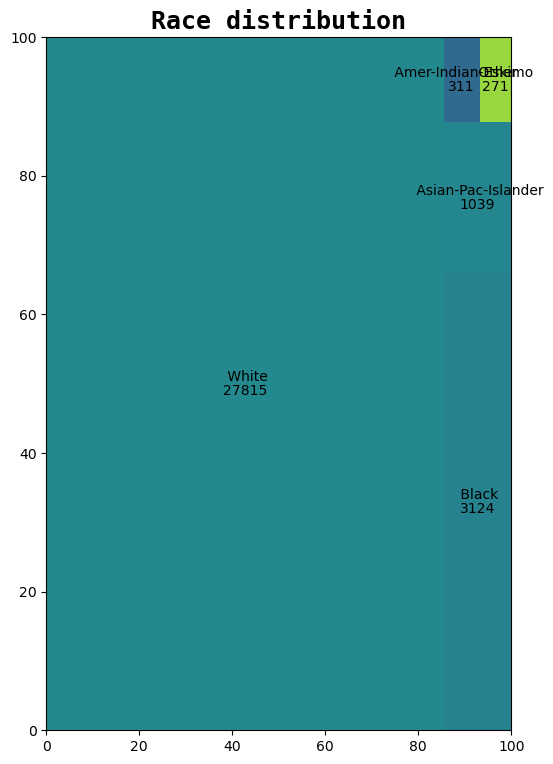

In [34]:
# Creating a Treemap for 'Race'

import squarify
race = dt['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 9))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.show()

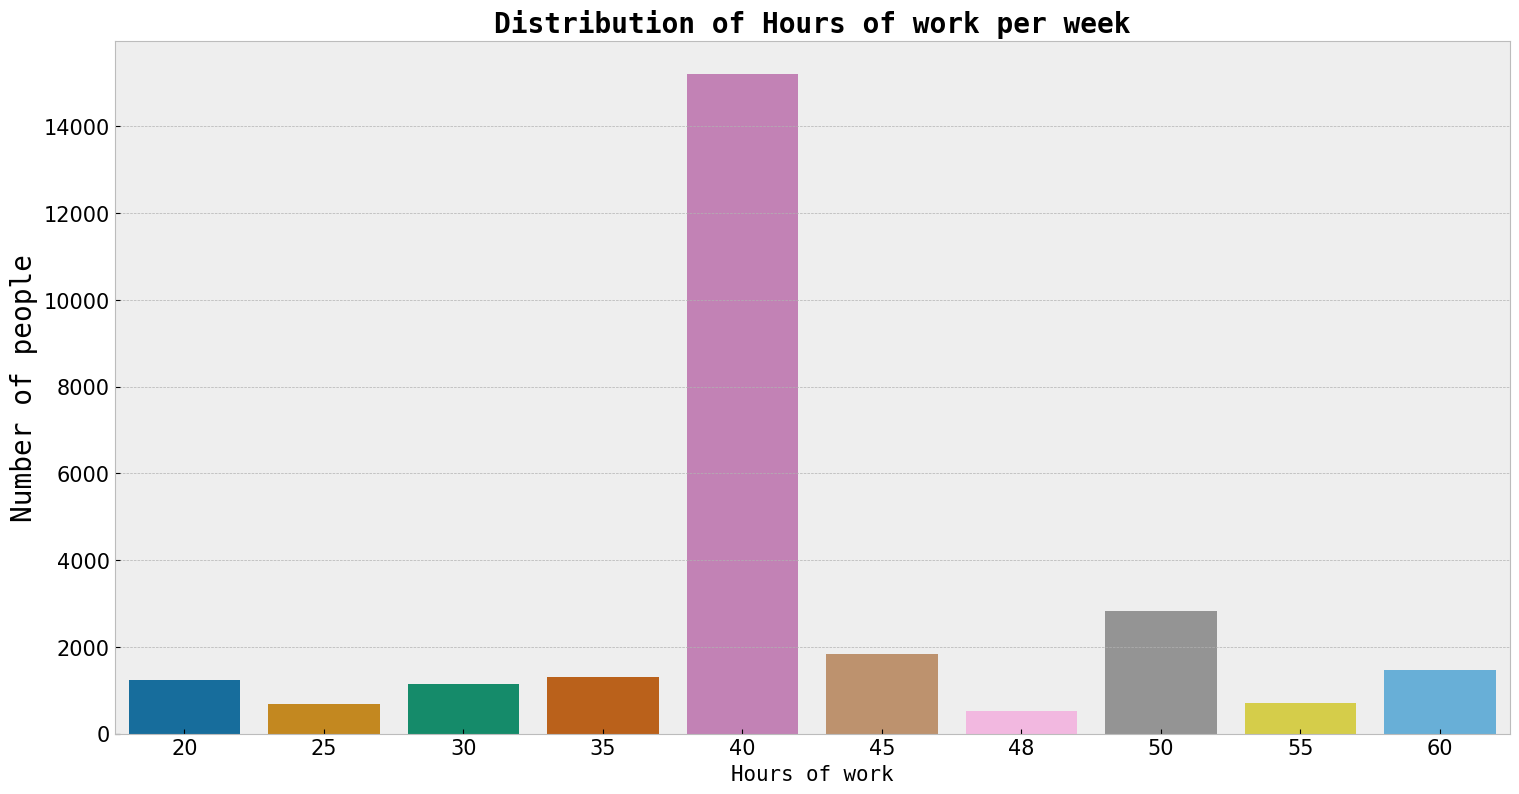

In [35]:
# Creating a barplot for 'Hours per week'

hours = dt['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(18, 9))
sns.barplot(hours.index, hours.values, palette='colorblind')

plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 20})
plt.tick_params(labelsize=15)
plt.show()

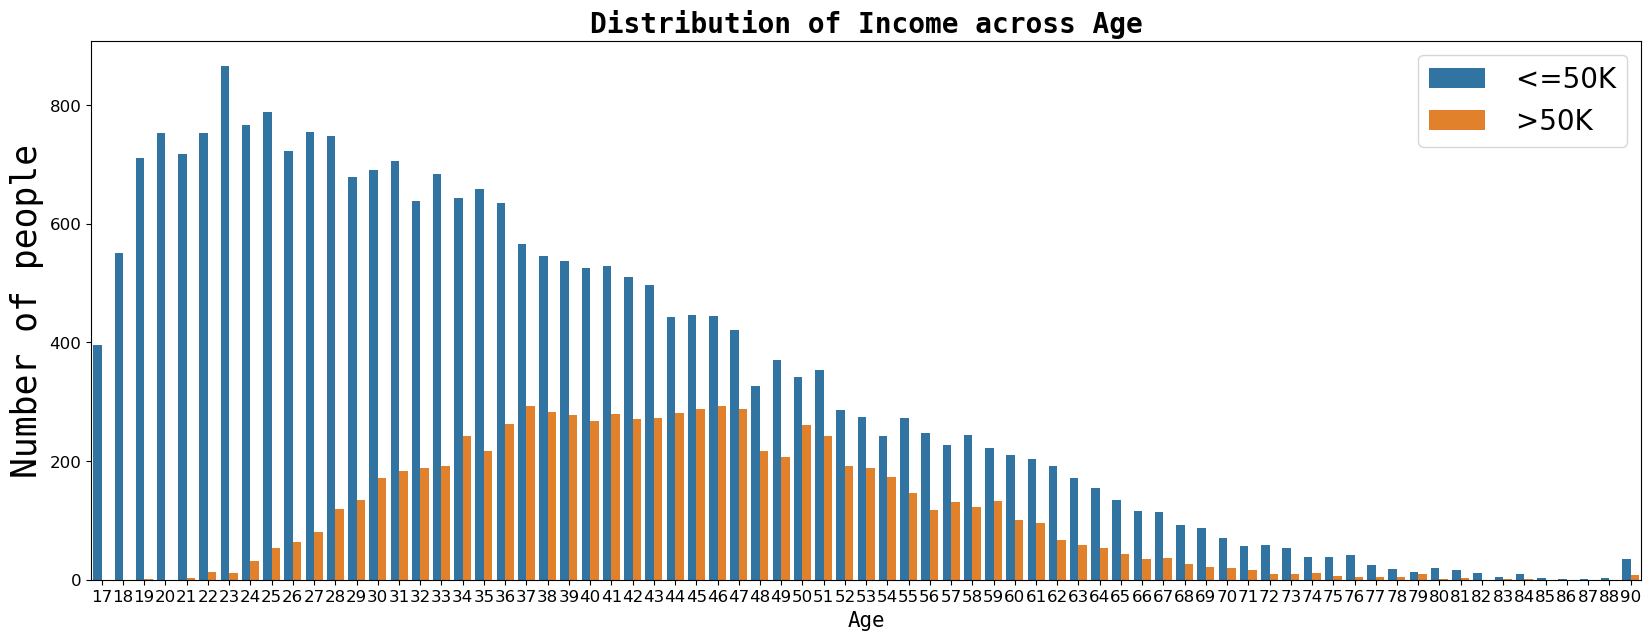

In [36]:
# Creating a countplot of income across age

plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dt['Age'], hue=dt['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 25})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 20})
plt.show()

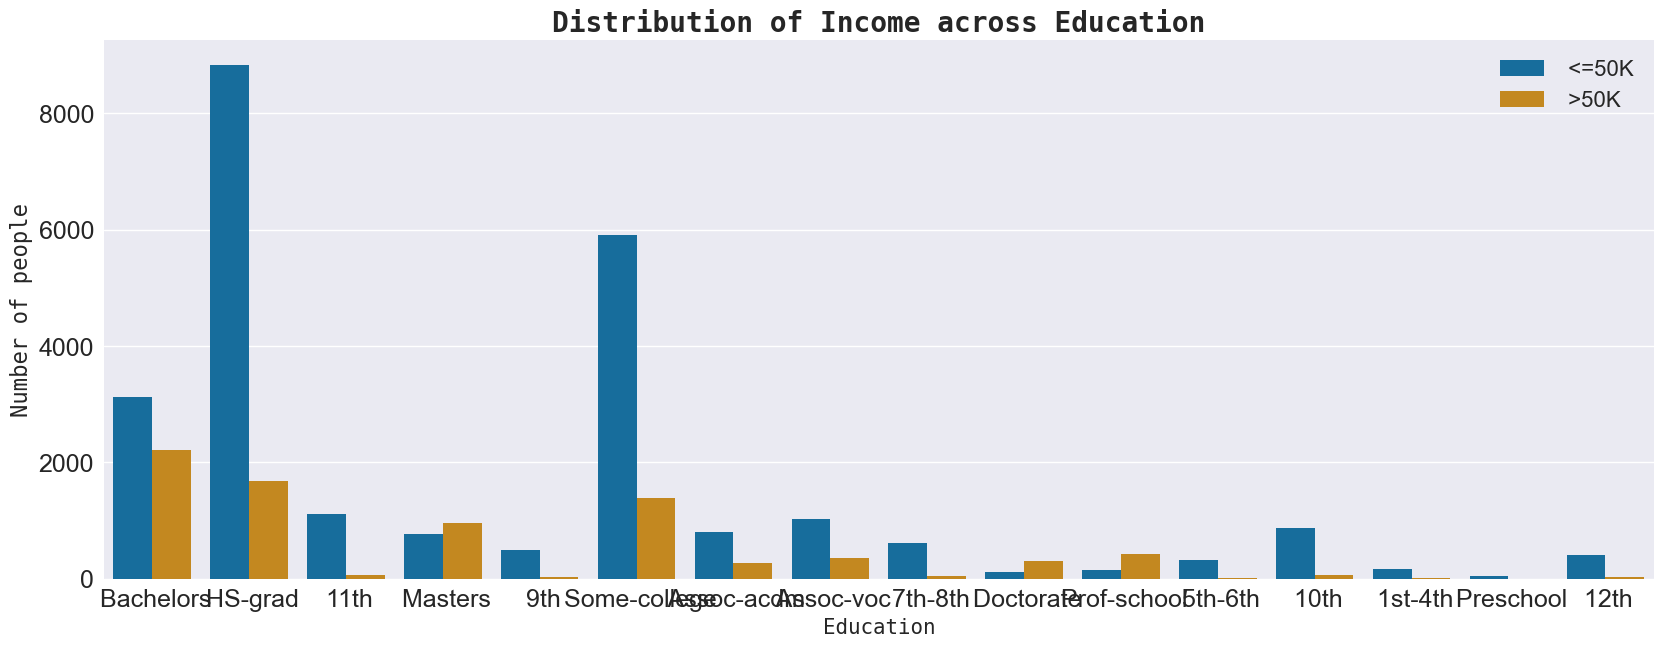

In [37]:
# Creating a countplot of income across education


plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dt['Education'],
              hue=dt['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.tick_params(labelsize=18)
plt.legend(loc=1, prop={'size': 16})
plt.show()


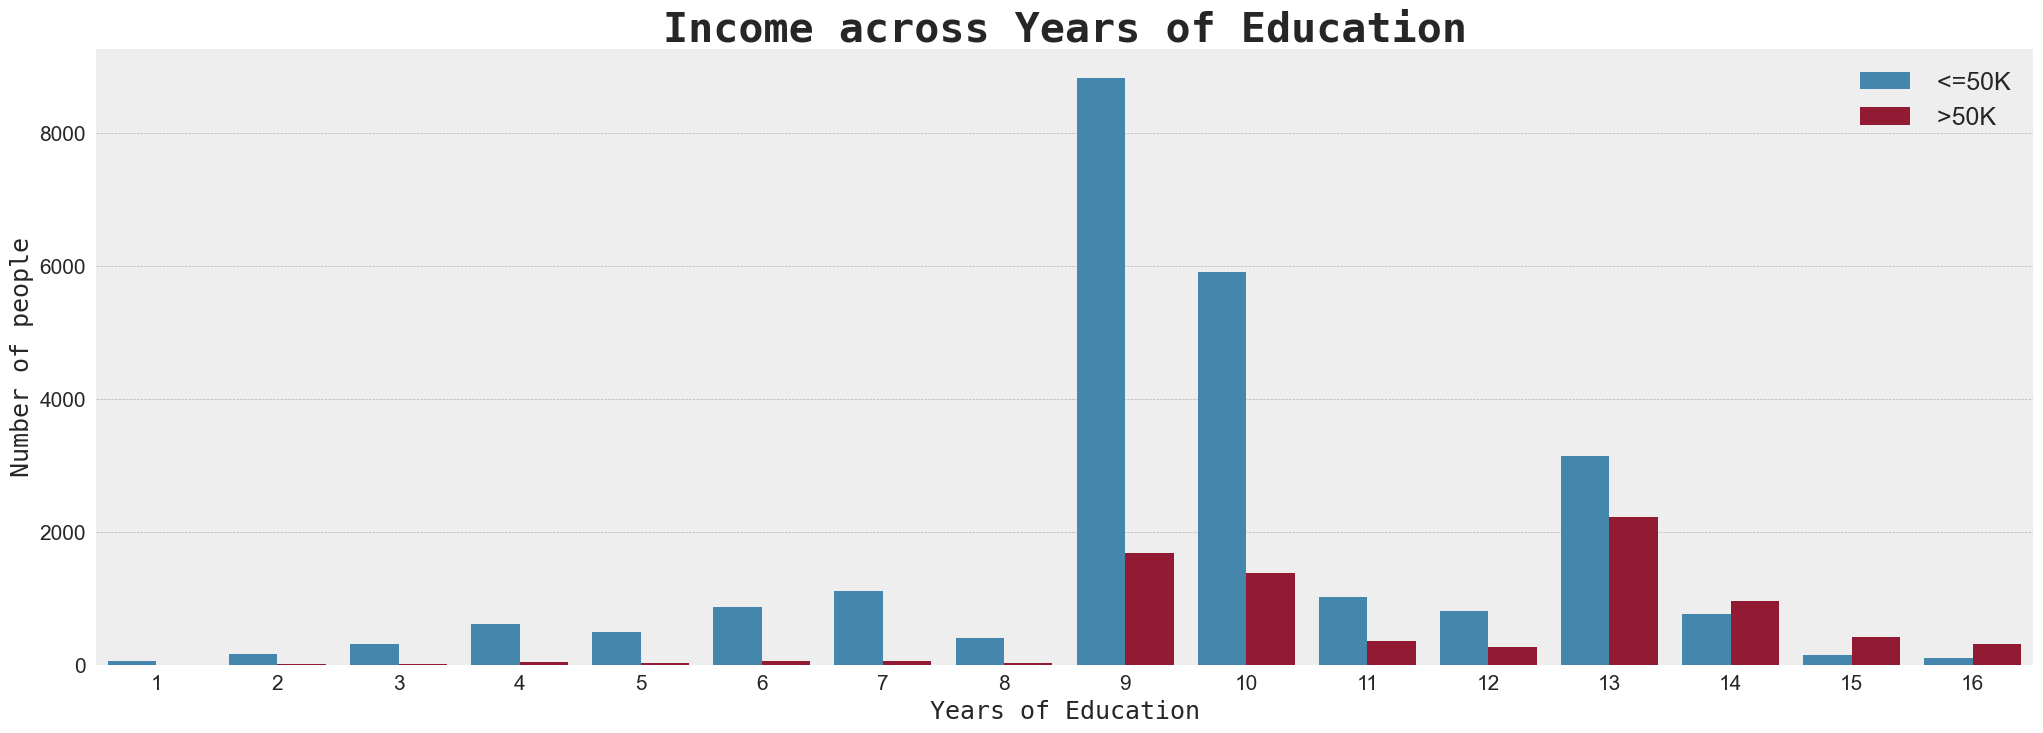

In [38]:
# Creating a countplot of income across years of education

plt.style.use('bmh')
plt.figure(figsize=(25, 8))
sns.countplot(dt['Education_num'],
              hue=dt['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.tick_params(labelsize=15)
plt.legend(loc=1, prop={'size': 18})
plt.savefig('bi2.png')
plt.show()

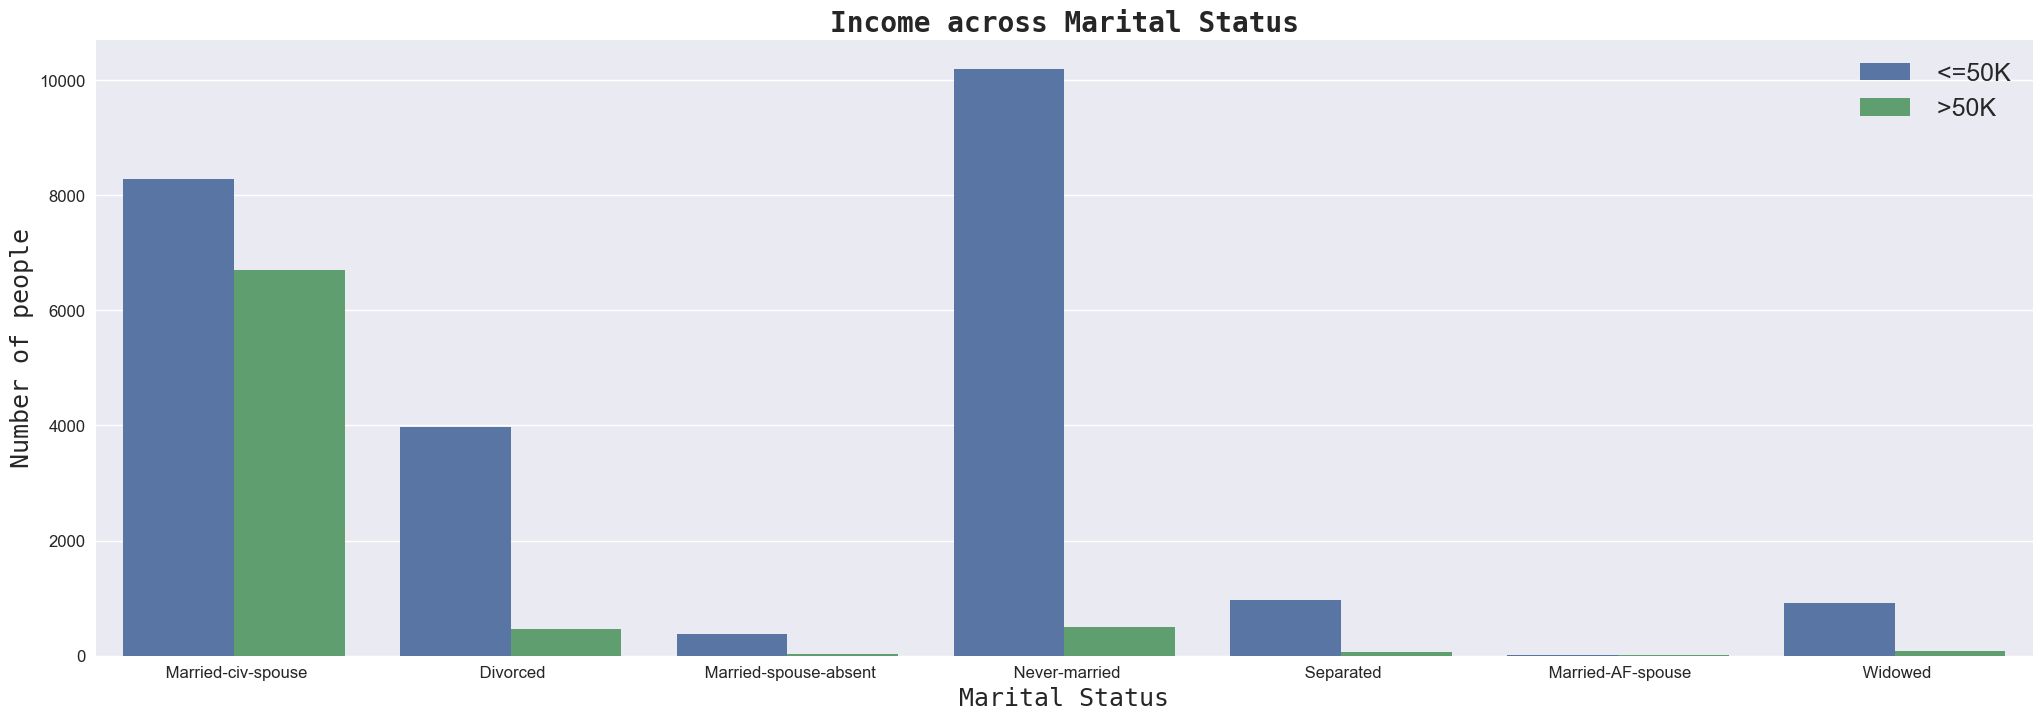

In [39]:
# Creating a countplot of income across Marital Status


plt.style.use('seaborn')
plt.figure(figsize=(25, 8))
sns.countplot(dt['Marital_status'], hue=dt['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 18})
plt.show()

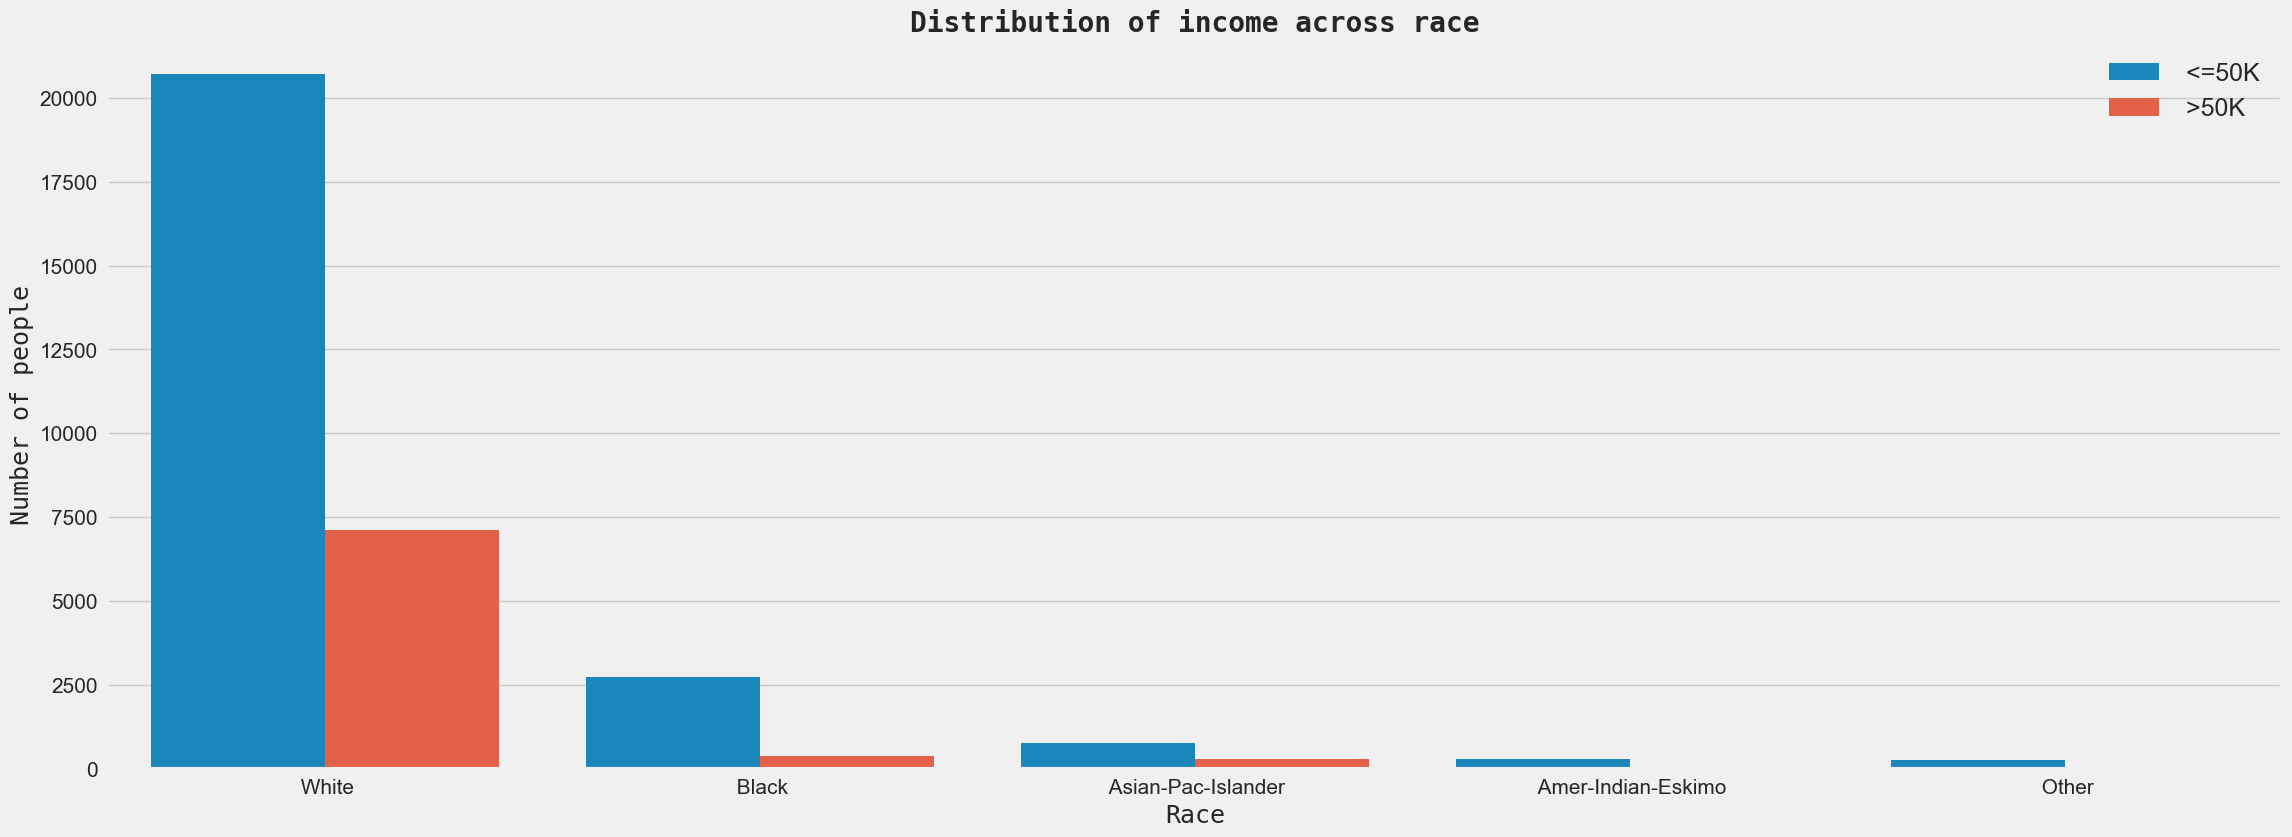

In [40]:
# Creating a countplot of income across race

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25, 9))
sns.countplot(dt['Race'], hue=dt['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.tick_params(labelsize=15)
plt.legend(loc=1, prop={'size': 18})
plt.show()

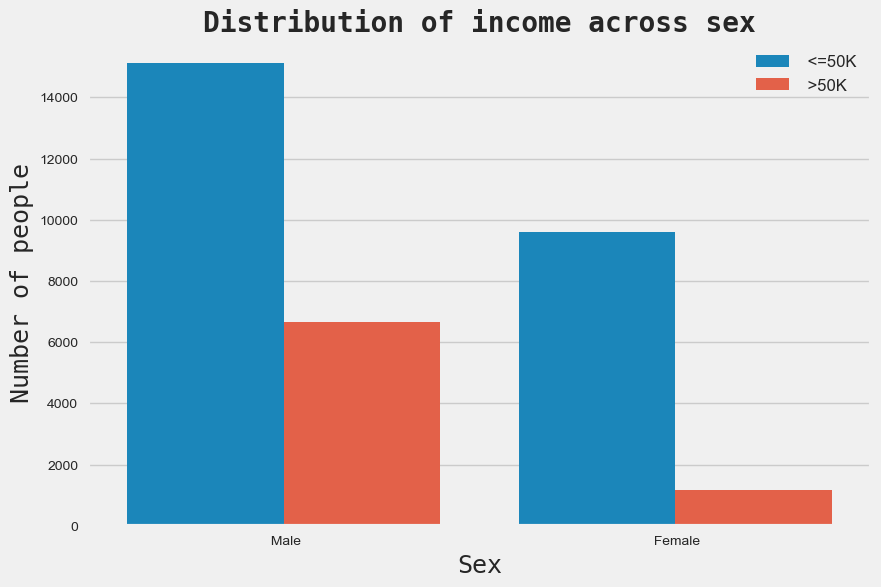

In [41]:
# Creating a countplot of income across sex


plt.style.use('fivethirtyeight')
plt.figure(figsize=(9, 6))
sns.countplot(dt['Sex'], hue=dt['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 18})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 12})
plt.savefig('bi3.png')
plt.show()

# : Considering Multivariate Analysis

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
dt['income'] = le.fit_transform(dt['Income'])

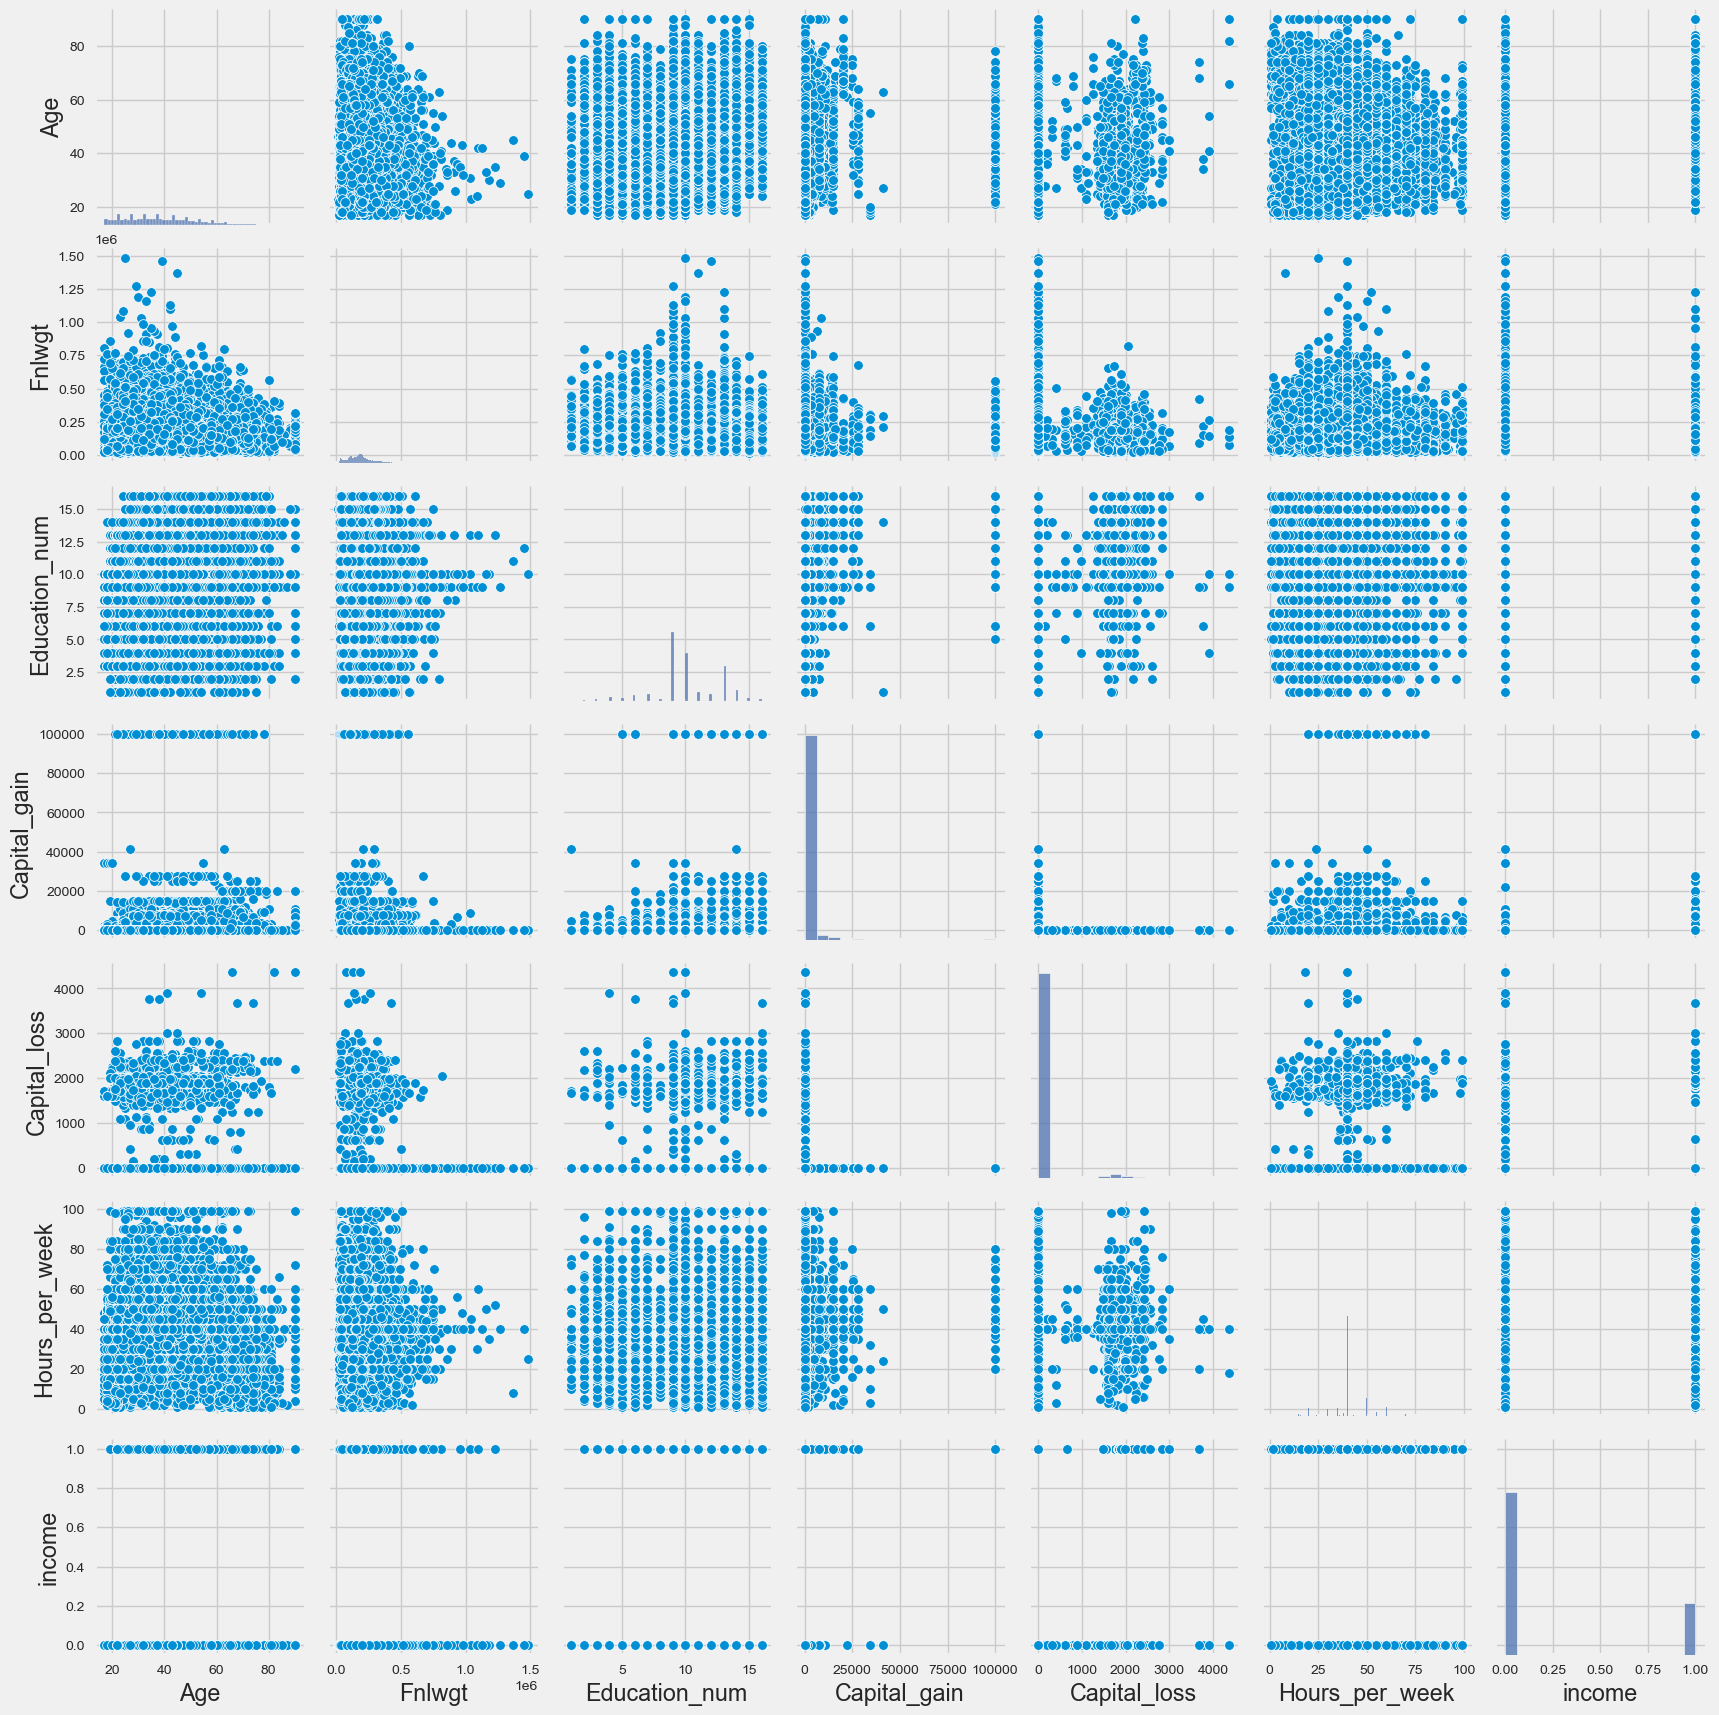

In [44]:
# Creating a pairplot of dataset

sns.pairplot(dt)
plt.savefig('multi1.png')
plt.show()

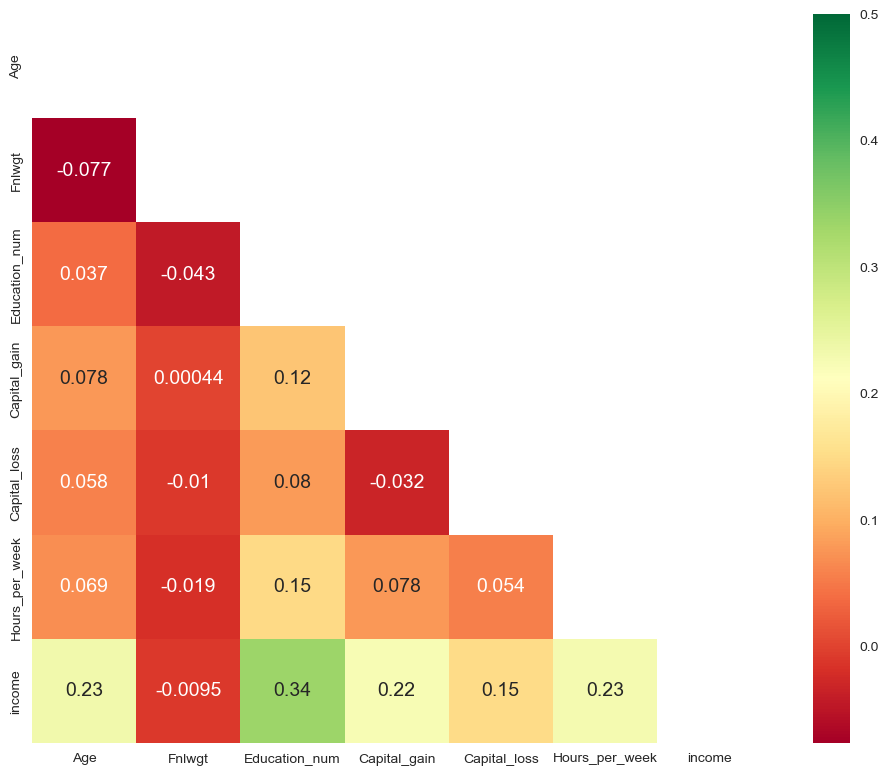

In [45]:
corr = dt.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# Observations: In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

# Step 04 : DATA PROCESSING

In [46]:
dt = dt.replace('?', np.nan)

In [48]:
# Checking null values

round((dt.isnull().sum() / dt.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
income            0.0 %
dtype: object

In [49]:
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']

In [50]:
for col in columns_with_nan:
    dt[col].fillna(dt[col].mode()[0], inplace=True)

# LABEL ENCODING

In [51]:
from sklearn.preprocessing import LabelEncoder

for col in dt.columns:
    if dt[col].dtypes == 'object':
        encoder = LabelEncoder()
        dt[col] = encoder.fit_transform(dt[col])

# FEATURE SELECTION

In [52]:
X = dt.drop('income', axis=1)
Y = dt['income']

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [54]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [55]:
feature_imp = selector.feature_importances_

In [56]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 1.03
1 0.09
2 0.07
3 0.55
4 1.92
5 2.56
6 0.35
7 2.64
8 0.06
9 1.27
10 1.65
11 0.4
12 0.28
13 0.03
14 87.1


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [58]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_gain', 'Native_country'], axis=1)

In [59]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [63]:
log_reg.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

Conclusion -

Have conducted Descriptive Analysis
Have conducuted various Exploratory Data Analysis
Conducted Univariate, Bivariate Analysis and MultiVariate Analysis
Data Processing has been done and Conducted various Machine learning algoritms. Due to lack of time and last minute work- couldnot made proper concluding , I will update later Kinldy accept the Requisition